In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline


In [88]:
data=pd.read_csv("Admission_Predict.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
data.shape

(400, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [15]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [89]:
data['Admit'] = data['Chance of Admit '].apply(lambda x: 0 if x < 0.75 else 1)

In [29]:
data=data.rename(columns={'Chance of Admit ':'Chance of Admit'})
data.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1


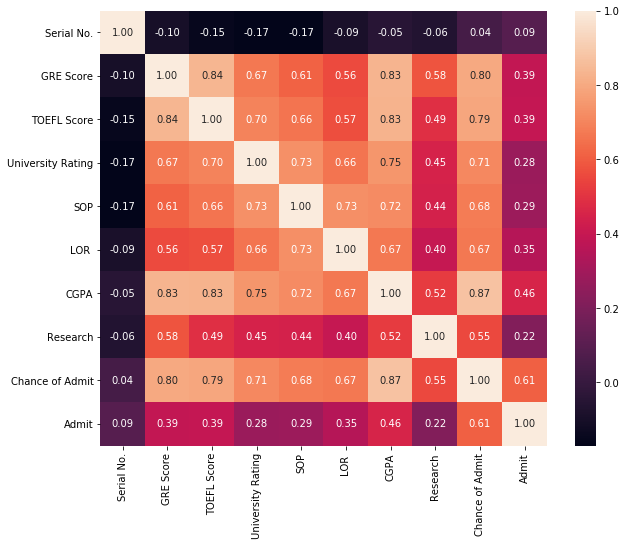

In [42]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True,fmt= '.2f')

In [43]:
#how many have research experience

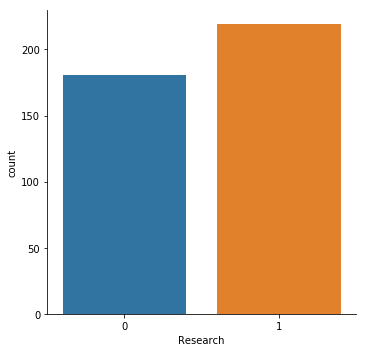

In [53]:
ax=sns.catplot('Research',data=data,kind='count')

In [54]:
#Variation of GRE and TOEFL scores

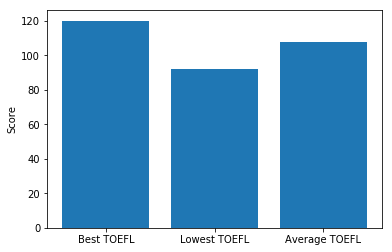

In [64]:
y=np.array([data['TOEFL Score'].max(),data['TOEFL Score'].min(),data['TOEFL Score'].mean()])
x=['Best TOEFL','Lowest TOEFL','Average TOEFL']
plt.bar(x,y)
plt.ylabel('Score')
plt.show()

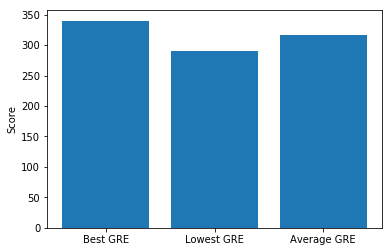

In [65]:
y=np.array([data['GRE Score'].max(),data['GRE Score'].min(),data['GRE Score'].mean()])
x=['Best GRE','Lowest GRE','Average GRE']
plt.bar(x,y)
plt.ylabel('Score')
plt.show()

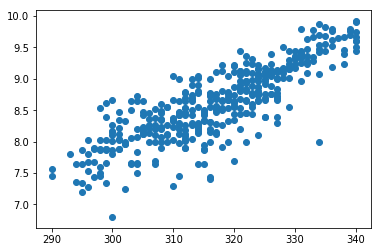

In [66]:
plt.scatter(data['GRE Score'],data['CGPA'])

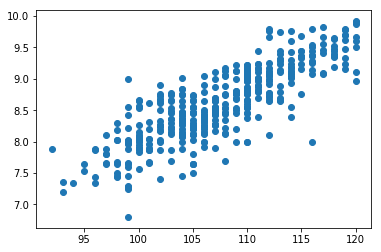

In [67]:
plt.scatter(data['TOEFL Score'],data['CGPA'])

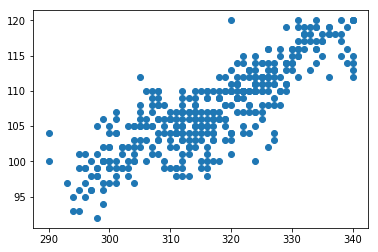

In [68]:
plt.scatter(data['GRE Score'],data['TOEFL Score'])

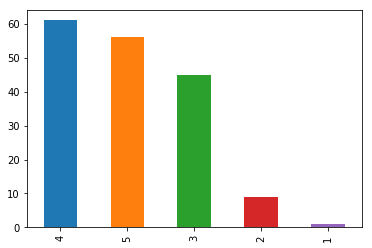

In [75]:
s=data[data['Chance of Admit ']>.75]['University Rating'].value_counts()
s.plot(x='University Rating',y='Chance of Admit ',kind='bar')

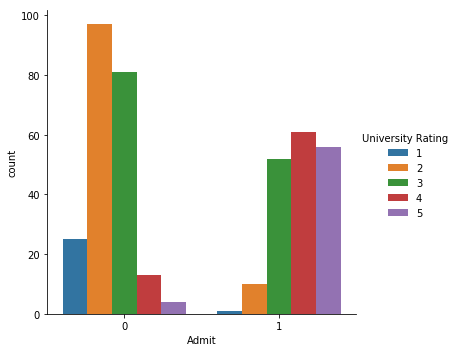

In [93]:
sns.catplot('Admit',kind='count',data=data,hue='University Rating')

In [123]:
sns.lmplot(x='CGPA',y='Chance of Admit',data=data)

KeyError: "['Chance of Admit '] not in index"

In [90]:
not_admit = data[data['Admit']==0]

In [91]:
not_admit.head(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0
7,8,308,101,2,3.0,4.0,7.90,0,0.68,0
8,9,302,102,1,2.0,1.5,8.00,0,0.50,0


In [94]:
#machine Learning

In [96]:
data.drop('Serial No.',inplace=True,axis=1)

In [99]:
data.rename(columns={'Chance of Admit ':'Chance of Admit'},inplace=True)

In [119]:
admit=data['Admit'].values
chance_admit=data['Chance of Admit'].values
#normalizing chance
chance_admit = (chance_admit - np.min(chance_admit))/(np.max(chance_admit)-np.min(chance_admit))

In [105]:
data.drop(['Chance of Admit','Admit'],inplace=True,axis=1)

In [128]:
x_train=data.loc[:int(.8*len(data))-1,:]
y_train=admit[:int(.8*len(data))]
x_test=data.loc[int(.8*len(data)):,:]
y_test=admit[int(.8*len(data)):]

In [129]:
x_train.shape

(320, 7)

In [130]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
y_predict=regressor.predict(x_test)

In [134]:
accuracy = (y_predict == y_test).sum() / float(len(y_predict))

In [135]:
accuracy

0.8625

In [137]:
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test,y_predict)

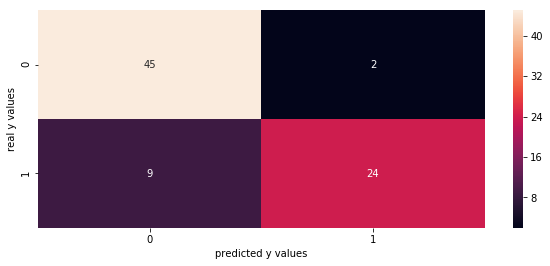

In [141]:
gig,ax = plt.subplots(figsize=(10,4))
sns.heatmap(cm_lrc,annot=True)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [142]:
cm_lrc

array([[45,  2],
       [ 9, 24]], dtype=int64)

In [144]:
precision=cm_lrc[1][1] / (cm_lrc[1][1]+cm_lrc[0][1])
recall=cm_lrc[1][1] / (cm_lrc[1][1]+cm_lrc[1][0])

In [145]:
precision

0.9230769230769231

In [146]:
recall

0.7272727272727273

In [152]:
fscore= 2 / ((1/precision)+(1/recall))

In [154]:
fscore

0.8135593220338984